In [1]:
import pandas as pd
import numpy as np
import re
import pickle

In [ ]:
# open train text file
f = open(f'./covid_text.pckl','rb')
covid_data = pickle.load(f)
f.close()

In [ ]:
f = open(f'./hashtag.pckl','rb')
hashtag = pickle.load(f)
f.close()

In [ ]:
## cleaning the tweets
def clean_text(text):
    text = re.sub(r'@[A-Za-z0-9]+','',text) #remove @mention
    text = re.sub(r'#','',text) # remove the hashtag symbol
    text = re.sub(r'https?:\/\/\S+', '',text) #remove hyperlink
    text = re.sub(r'\n','',text) # remove \n 
    text = re.sub(r'\r','',text) # remove \r
    text = re.sub(r'[0-9]+','',text) #remove all the number
    text = re.sub(r'\W+', ' ', text) #remove special characters
    text = text.strip().lower()
    if len(text) != 0:
        return text
    else:
        return None
    
for i in range(len(covid_data)):
    for j in range(len(covid_data[i])):
        covid_data[i][j] = clean_text(covid_data[i][j])
    covid_data[i] = [x for x in covid_data[i] if x is not None]
        

In [ ]:
# merge source tweeet and reply tweet together for test data    
covid_merge_events=[]
for event in covid_data:
    merge = ''
    for tweet in event:
        merge = merge + tweet
    covid_merge_events.append(merge)

In [ ]:
covid_df = pd.DataFrame({'text':covid_merge_events})

nan_value = float("NaN")

covid_df.replace("", nan_value, inplace=True)

covid_df.dropna(axis=0 ,inplace=True)

covid_df.to_csv('covid.tsv', sep='\t',index=False)

In [ ]:
covid_df.shape

(17012, 1)

In [11]:
df = pd.read_csv('covid_predict.csv')

In [12]:
df

,text,Predicted
0,according to the new york times warner bros wa...,0
1,hurricane hanna has made landfall in texas the...,0
2,monkeys on the loose in india with stolen coro...,0
3,let s not play blind that the work is fighting...,0
4,if trump felt comfortable having it here then ...,0
...,...,...
17007,i wonder how many lives could ve been saved if...,0
17008,the front page on th march the first line read...,0
17009,trump just completed the racism trifecta in a ...,1
17010,here are a few of my photographs from today s ...,0


In [ ]:
df['text'][0]

'according to the new york times warner bros wanted to delay christopher nolan s tenet months ago due to the covid pandemic but nolan refused to listen to any discussions the studio kept the original release date to keep nolan happy'

In [13]:
df_nonrummor = df[df['Predicted'] == 0]

In [14]:
df_nonrummor.shape

(14914, 2)

In [15]:
df_rummor = df[df['Predicted'] == 1]

In [16]:
df_rummor.shape

(2098, 2)

In [8]:
# Installations
import sys
if 'google.colab' in sys.modules:
    !pip install emoji --upgrade
    !pip install pandas-profiling==2.*
    !pip install plotly==4.*
    !python -m spacy download en_core_web_lg
    !pip install pyldavis
    !pip install gensim
    !pip install chart_studio
    !pip install --upgrade autopep8

     |████████████████████████████████| 175 kB 4.3 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=237e733d3cffa31d5ac625544ad860925793a6ff729c2fda42b9b6f233cb0ec7
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji
     |████████████████████████████████| 245 kB 5.2 MB/s 
     |████████████████████████████████| 690 kB 46.3 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
     |████████████████████████████████| 4.7 MB 29.9 MB/s 
     |████████████████████████████████| 102 kB 55.1 MB/s 
     |████████████████████████████████| 812 kB 61.5 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=8488596b7eff2222aa6ed2826a71ef13cde30d13a631f5f1116534ce3295b4a0
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655

In [10]:
# Required Libraries

#Base and Cleaning 
import json
import requests
import pandas as pd
import numpy as np
import emoji
import regex
import re
import string
from collections import Counter

#Visualizations
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt 

import chart_studio
import chart_studio.plotly as py 
import chart_studio.tools as tls

#Natural Language Processing (NLP)
import spacy
import gensim
from spacy.tokenizer import Tokenizer
from gensim.corpora import Dictionary
from gensim.models.ldamulticore import LdaMulticore
from gensim.models.coherencemodel import CoherenceModel
from gensim.parsing.preprocessing import STOPWORDS as SW
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint
from wordcloud import STOPWORDS
stopwords = set(STOPWORDS)

/usr/local/lib/python3.7/dist-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [24]:
rummors = df_rummor['text'].to_numpy()
non_rummors = df_nonrummor['text'].to_numpy()

In [61]:
from gensim.parsing.preprocessing import remove_stopwords

import nltk
nltk.download('punkt')
rummor_tokens = []
for rummor in rummors:
  rummor = remove_stopwords(rummor)
  token = nltk.word_tokenize(rummor)
  rummor_tokens.append(token)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [62]:
from nltk.stem import WordNetLemmatizer
 
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')
for tokens in rummor_tokens:
  for i in range(len(tokens)):
    tokens[i] = lemmatizer.lemmatize(tokens[i])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [96]:
rummor_token_final =[]
for tokens in rummor_tokens:
  temp=[]
  for token in tokens:
    if len(token) >=3 and token not in temp:
      temp.append(token)
  rummor_token_final.append(temp) 

In [100]:
# Create a id2word dictionary
id2word = Dictionary(rummor_token_final)
print(len(id2word))
# Filtering Extremes
id2word.filter_extremes(no_below=2, no_above=.99)
print(len(id2word))
# Creating a corpus object 
corpus = [id2word.doc2bow(d) for d in rummor_token_final]

15596


In [102]:
# Instantiating a Base LDA model 
base_model = LdaMulticore(corpus=corpus, num_topics=5, id2word=id2word, workers=12, passes=5)


/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [105]:
words = [re.findall(r'"([^"]*)"',t[1]) for t in base_model.print_topics()]
topics = [' '.join(t[0:10]) for t in words]
# Getting the topics
for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

------ Topic 0 ------
coronavirus covid trump people death american virus pandemic amp know

------ Topic 1 ------
covid coronavirus trump like people amp death think american know

------ Topic 2 ------
coronavirus covid trump amp people death president like day american

------ Topic 3 ------
coronavirus covid trump people amp president american death virus pandemic

------ Topic 4 ------
covid coronavirus trump like people amp president china american time



In [106]:
# Compute Perplexity
# a measure of how good the model is. lower the better
base_perplexity = base_model.log_perplexity(corpus)
print('\nPerplexity: ', base_perplexity) 

# Compute Coherence Score
coherence_model = CoherenceModel(model=base_model, texts=rummor_token_final, 
                                   dictionary=id2word, coherence='c_v')
coherence_lda_model_base = coherence_model.get_coherence()
print('\nCoherence Score: ', coherence_lda_model_base)

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for


Perplexity:  -8.645044225328508

Coherence Score:  0.7692178397123337


In [107]:
import pyLDAvis.gensim_models

In [108]:
#Creating Topic Distance Visualization 
pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(base_model, corpus, id2word)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.008732 -0.003166       1        1  41.074165
2     -0.017890  0.003430       2        1  25.083305
4     -0.010865 -0.031254       3        1  20.580052
0     -0.014219  0.028945       4        1   9.608630
1      0.051706  0.002045       5        1   3.653848, topic_info=            Term         Freq        Total Category  logprob  loglift
6          covid  1425.000000  1425.000000  Default  30.0000  30.0000
45   coronavirus  1386.000000  1386.000000  Default  29.0000  29.0000
229        trump  1214.000000  1214.000000  Default  28.0000  28.0000
136         like   763.000000   763.000000  Default  27.0000  27.0000
13        people   928.000000   928.000000  Default  26.0000  26.0000
..           ...          ...          ...      ...      ...      ...
41         china    18.687329   520.633048   Topic5  -6.2549  -0.0178
552        going    18.286446   512.701286   Topic5  -6.2766  -0.0241
146      million    17.110023   434.532611   Topic5  -6.3431   0.0748
196        right    17.280545   458.995869   Topic5  -6.3331   0.0299
207        state    17.144799   507.104133   Topic5  -6.3410  -0.0776

[472 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
253       1  0.345975  administration
253       2  0.299845  administration
253       3  0.220765  administration
253       4  0.108735  administration
253       5  0.029655  administration
...     ...       ...             ...
1031      2  0.213947            year
1031      3  0.258301            year
1031      4  0.117410            year
1031      5  0.054791            year
1177      4  0.617965             zoo

[950 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 5, 1, 2])

In [113]:
text = [' '.join(map(str, l)) for l in rummor_token_final]

In [116]:
vectorizer = CountVectorizer()
data_vectorized = vectorizer.fit_transform(text)

In [118]:
# Define Search Param
search_params = {'n_components': [10, 20, 30], 'learning_decay': [.5]}

# Init the Model
lda = LatentDirichletAllocation()

# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)

# Do the Grid Search
model.fit(data_vectorized)
GridSearchCV(cv=None, error_score='raise',
             estimator=LatentDirichletAllocation(batch_size=128, 
                                                 doc_topic_prior=None,
                                                 evaluate_every=-1, 
                                                 learning_decay=0.7, 
                                                 learning_method=None,
                                                 learning_offset=10.0, 
                                                 max_doc_update_iter=100, 
                                                 max_iter=10,
                                                 mean_change_tol=0.001, 
                                                 n_components=10, 
                                                 n_jobs=1,
                                                 perp_tol=0.1, 
                                                 random_state=None,
                                                 topic_word_prior=None, 
                                                 total_samples=1000000.0, 
                                                 verbose=0),
             n_jobs=1,
             param_grid={'n_topics': [10, 20, 30], 
                         'learning_decay': [0.5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
             scoring=None, verbose=0)
# Best Model
best_lda_model = model.best_estimator_

# Model Parameters
print("Best Model's Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(data_vectorized))

Best Model's Params:  {'learning_decay': 0.5, 'n_components': 10}
Best Log Likelihood Score:  -796746.8858647719
Model Perplexity:  14251.956980793346


In [119]:
model_final = LdaMulticore(corpus=corpus,
                       id2word=id2word,
                       num_topics=10,
                       decay=0.5)

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [125]:
words = [re.findall(r'"([^"]*)"',t[1]) for t in model_final.print_topics()]
topics = [' '.join(t[0:10]) for t in words]
# Getting the topics
for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

------ Topic 0 ------
coronavirus covid amp like trump american people day president think

------ Topic 1 ------
covid trump coronavirus know need american amp president people case

------ Topic 2 ------
trump coronavirus covid death president state life know case time

------ Topic 3 ------
covid coronavirus trump people amp pandemic country president american let

------ Topic 4 ------
coronavirus covid trump pandemic american people isn said going bad

------ Topic 5 ------
covid trump coronavirus pandemic amp american people like life virus

------ Topic 6 ------
coronavirus covid people trump like know death american dead state

------ Topic 7 ------
coronavirus trump covid people president pandemic amp like time know

------ Topic 8 ------
covid trump coronavirus president death people called like amp flu

------ Topic 9 ------
covid coronavirus trump people know new president death america virus



In [126]:
#Creating Topic Distance Visualization 
pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(model_final, corpus, id2word)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.019932  0.009805       1        1  31.995645
0      0.009058 -0.001787       2        1  17.307237
5      0.001208  0.017628       3        1  17.250087
3      0.027580 -0.015979       4        1   8.061163
4     -0.012175  0.004822       5        1   7.179506
6      0.008823 -0.010239       6        1   5.007826
8     -0.042310 -0.020225       7        1   4.238913
2     -0.009457  0.032517       8        1   4.001133
1     -0.011197  0.000900       9        1   3.284944
9      0.008537 -0.017443      10        1   1.673546, topic_info=            Term         Freq        Total Category  logprob  loglift
6          covid  1673.000000  1673.000000  Default  30.0000  30.0000
45   coronavirus  1733.000000  1733.000000  Default  29.0000  29.0000
229        trump  1506.000000  1506.000000  Default  28.0000  28.0000
13        people  1016.000000  1016.000000  Default  27.0000  27.0000
173    president   837.000000   837.000000  Default  26.0000  26.0000
..           ...          ...          ...      ...      ...      ...
26      american     9.110683   815.400863  Topic10  -6.1924  -0.4040
727         want     8.525918   603.535813  Topic10  -6.2588  -0.1695
27           amp     8.886521   920.983255  Topic10  -6.2174  -0.5507
146      million     7.860033   376.175490  Topic10  -6.3401   0.2220
199         said     7.917199   552.789238  Topic10  -6.3329  -0.1557

[742 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
4017      2  0.075816  abdicating
4017      4  0.682345  abdicating
4017      6  0.151632  abdicating
9046      1  0.843074    absorbed
9046      2  0.064852    absorbed
...     ...       ...         ...
1031      6  0.053512        year
1031      7  0.020067        year
1031      8  0.046823        year
1031      9  0.036790        year
1031     10  0.013378        year

[2898 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 1, 6, 4, 5, 7, 9, 3, 2, 10])

SENTIMENT

In [127]:
    !pip install vaderSentiment

     |████████████████████████████████| 125 kB 5.5 MB/s 


In [128]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [140]:
tweetsWithSent = []
for tweet in rummors:
  ps = analyzer.polarity_scores(tweet)
  tweetsWithSent.append({'text':tweet, 'compound':ps['compound']})

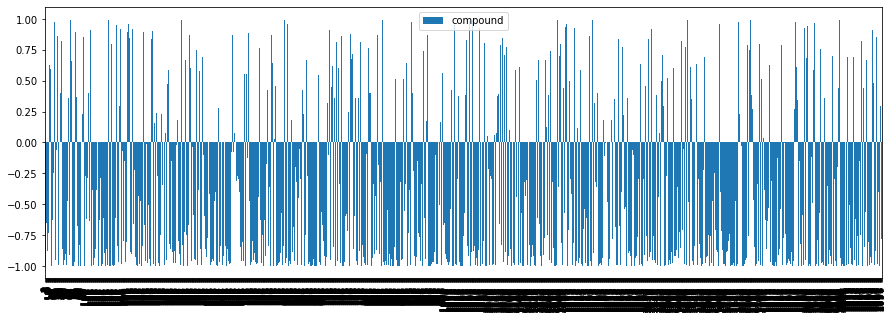

In [141]:
tweetdf = pd.DataFrame(tweetsWithSent)
tweetdf.plot.bar(figsize=(15,5),width=1)